# Physics 559 - Gravitation and Cosmology - HW4

## Tucker Knaak - Department of Physics, Creighton University - Fall 2022

### 1. If $H=71$ km/Mpc/s, $\Omega_{v,0}=0.73$, $\Omega_{m,0}=0.269992$, and $\Omega_{r,0}=0.00008$, calculate:

#### (a) the age of the universe now

#### (b) the age of the universe at the radiation-matter equality

#### (c) the value of $q_0$.

#### (d) Is the universe open or closed?

#### (e) Will the universe expand forever or stop and re-collapse?

In [1]:
'''Required Libraries'''
import matplotlib.pyplot as plt
import numpy as np

'''Required Functions'''
from scipy.integrate import quad

In [2]:
'''Function to calculate the age of the universe'''
def age(a):
    t0 = 1 / (H0 * np.sqrt(1 - (v0 + m0 + r0) + (r0 / a**2) + (m0 / a) + (v0 * a**2)))
    return t0

The current age of the universe is t0 = 1.37E+10 years.
The age of the universe at the radiation-matter equality was t = 4.77E+04 years.
The current deceleration parameter is q0 = -0.59.
The curvature of the universe is k = 0.0, so the universe is neither open nor closed.


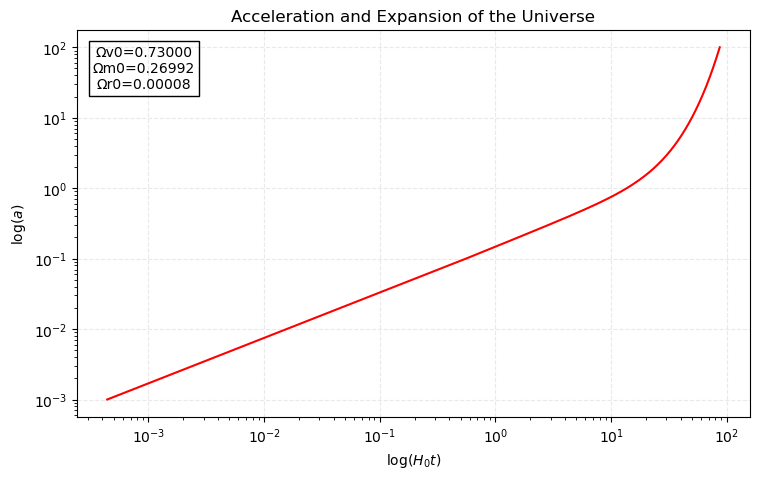

In [3]:
'''Given constants'''
v0 = 0.73                 #cosmological constant density
m0 = 0.26992              #matter density
r0 = 0.00008              #radiation density
H0 = 71 / (3.086*10**19)  #Hubble constant [1 / s]
s_to_yr = 3.171 * 10**-8  #seconds to year conversion


'''Calculate relevant data'''
age_now = quad(age, 0, 1)[0] * s_to_yr        #current age of universe [yr]
age_rme = quad(age, 0, 0.00028)[0] * s_to_yr  #age of universe at radiation-matter equality
q0 = (m0 / 2) + r0 - v0                       #deceleration parameter
k = (H0**2) + (v0 + m0 + r0 - 1)              #curvature


'''Find H0t vs a'''
scalefactor = np.linspace(0.001, 100, 1000)
H0t_list = [quad(age, 0, a)[0] * s_to_yr * 10**-9 for a in scalefactor]


'''Print results'''
print(f'The current age of the universe is t0 = {age_now:.2E} years.')
print(f'The age of the universe at the radiation-matter equality was t = {age_rme:.2E} years.')
print(f'The current deceleration parameter is q0 = {q0:.2f}.')
print(f'The curvature of the universe is k = {abs(k):.1f}, so the universe is neither open nor closed.')


'''Create figure and plot results'''
text = f'\u03A9v0={v0:.5f}\n\u03A9m0={m0:.5f}\n\u03A9r0={r0:.5f}'
fig, ax = plt.subplots(1, 1, figsize = (8, 5))
fig.tight_layout(pad = 3)
ax.set_xlabel('$\log(H_0t)$')
ax.set_ylabel('$\log(a)$')
ax.set_title('Acceleration and Expansion of the Universe')
ax.set_xscale('log')
ax.set_yscale('log')
ax.grid(True, linestyle = 'dashed', color = 'darkgray', alpha = 0.25)
ax.plot(H0t_list, scalefactor, linestyle = 'solid', color = 'red')
ax.annotate(text, xy = (0.1, 0.9), xycoords = 'axes fraction',
            ha = 'center', va = 'center', bbox = dict(boxstyle = 'square', edgecolor = 'black', facecolor = 'none'))


'''Save figure'''
fig.savefig('c:/Users/Tucker Knaak/Downloads/AccelerationExpansionUniverse.png')